<center>
<img src="../../img/ods_stickers.jpg">


[Материал разработат на основе электронного ресурса](Ю.Кашницкого.https://mlcourse.ai/book/index.html)

# <center> Композиции алгоритмов, случайный лес
## <center>Практика. Деревья решений и случайный лес в соревновании Kaggle Inclass по кредитному скорингу

Тут веб-формы для ответов нет, ориентируйтесь на рейтинг [соревнования](https://inclass.kaggle.com/c/beeline-credit-scoring-competition-2), [ссылка](https://www.kaggle.com/t/115237dd8c5e4092a219a0c12bf66fc6)
для участия.

Решается задача кредитного скоринга. 

Признаки клиентов банка:
- Age - возраст (вещественный)
- Income - месячный доход (вещественный)
- BalanceToCreditLimit - отношение баланса на кредитной карте к лимиту по кредиту (вещественный)
- DIR - Debt-to-income Ratio (вещественный)
- NumLoans - число заемов и кредитных линий
- NumRealEstateLoans - число ипотек и заемов, связанных с недвижимостью (натуральное число)
- NumDependents - число членов семьи, которых содержит клиент, исключая самого клиента (натуральное число)
- Num30-59Delinquencies - число просрочек выплат по кредиту от 30 до 59 дней (натуральное число)
- Num60-89Delinquencies - число просрочек выплат по кредиту от 60 до 89 дней (натуральное число)
- Delinquent90 - были ли просрочки выплат по кредиту более 90 дней (бинарный) - имеется только в обучающей выборке

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

**Загружаем данные.**

In [2]:
train_df = pd.read_csv('../../data/credit_scoring_train.csv', index_col='client_id')
test_df = pd.read_csv('../../data/credit_scoring_test.csv', index_col='client_id')

FileNotFoundError: [Errno 2] No such file or directory: '../../data/credit_scoring_train.csv'

In [ ]:
y = train_df['Delinquent90']
train_df.drop('Delinquent90', axis=1, inplace=True)

In [ ]:
train_df.head()

**Посмотрим на число пропусков в каждом признаке.**

In [ ]:
train_df.info()

In [ ]:
test_df.info()

**Заменим пропуски медианными значениями.**

In [ ]:
train_df['NumDependents'].fillna(train_df['NumDependents'].median(), inplace=True)
train_df['Income'].fillna(train_df['Income'].median(), inplace=True)
test_df['NumDependents'].fillna(test_df['NumDependents'].median(), inplace=True)
test_df['Income'].fillna(test_df['Income'].median(), inplace=True)

### Дерево решений без настройки параметров

**Обучите дерево решений максимальной глубины 3, используйте параметр random_state=17 для воспроизводимости результатов.**

In [ ]:
first_tree = # Ваш код здесь
first_tree.fit # Ваш код здесь

**Сделайте прогноз для тестовой выборки.**

In [ ]:
first_tree_pred = first_tree # Ваш код здесь

**Запишем прогноз в файл.**

In [ ]:
def write_to_submission_file(predicted_labels, out_file,
                             target='Delinquent90', index_label="client_id"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(75000,
                                                  predicted_labels.shape[0] + 75000),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [ ]:
write_to_submission_file(first_tree_pred, 'credit_scoring_first_tree.csv')

**Если предсказывать вероятности дефолта для клиентов тестовой выборки, результат будет намного лучше.**

In [ ]:
first_tree_pred_probs = first_tree.predict_proba(test_df)[:, 1]

In [ ]:
write_to_submission_file # Ваш код здесь

## Дерево решений с настройкой параметров с помощью GridSearch

**Настройте параметры дерева с помощью `GridSearhCV`, посмотрите на лучшую комбинацию параметров и среднее качество на 5-кратной кросс-валидации. Используйте параметр `random_state=17` (для воспроизводимости результатов), не забывайте про распараллеливание (`n_jobs=-1`).**

In [ ]:
tree_params = {'max_depth': list(range(3, 8)),
               'min_samples_leaf': list(range(5, 13))}

locally_best_tree = GridSearchCV # Ваш код здесь
locally_best_tree.fit # Ваш код здесь

In [ ]:
locally_best_tree.best_params_, round(locally_best_tree.best_score_, 3)

**Сделайте прогноз для тестовой выборки и пошлите решение на Kaggle.**

In [ ]:
tuned_tree_pred_probs = locally_best_tree # Ваш код здесь

In [ ]:
write_to_submission_file # Ваш код здесь

### Случайный лес без настройки параметров

**Обучите случайный лес из деревьев неограниченной глубины, используйте параметр `random_state=17` для воспроизводимости результатов.**

In [ ]:
first_forest = # Ваш код здесь
first_forest.fit # Ваш код здесь

In [ ]:
first_forest_pred = first_forest # Ваш код здесь

**Сделайте прогноз для тестовой выборки и пошлите решение на Kaggle.**

In [ ]:
write_to_submission_file # Ваш код здесь

### Случайный лес c настройкой параметров

**Настройте параметр `max_features` леса с помощью `GridSearhCV`, посмотрите на лучшую комбинацию параметров и среднее качество на 5-кратной кросс-валидации. Используйте параметр random_state=17 (для воспроизводимости результатов), не забывайте про распараллеливание (n_jobs=-1).**

In [ ]:
%%time
forest_params = {'max_features': np.linspace(.3, 1, 7)}

locally_best_forest = GridSearchCV # Ваш код здесь
locally_best_forest.fit # Ваш код здесь

In [ ]:
locally_best_forest.best_params_, round(locally_best_forest.best_score_, 3)

In [ ]:
tuned_forest_pred = locally_best_forest # Ваш код здесь

In [ ]:
write_to_submission_file # Ваш код здесь

**Посмотрите, как настроенный случайный лес оценивает важность признаков по их влиянию на целевой. Представьте результаты в наглядном виде с помощью `DataFrame`.**

In [ ]:
pd.DataFrame(locally_best_forest.best_estimator_.feature_importances_ # Ваш код здесь

**Обычно увеличение количества деревьев только улучшает результат. Так что напоследок обучите случайный лес из 300 деревьев с найденными лучшими параметрами. Это может занять несколько минут.**

In [ ]:
time
final_forest = RandomForestClassifier # Ваш код здесь
final_forest.fit(train_df, y)
final_forest_pred = final_forest.predict_proba(test_df)[:, 1]
write_to_submission_file(final_forest_pred, 'credit_scoring_final_forest.csv')

Данные загружены и обработаны.
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск лучших параметров занял: 57.47 сек.
Лучшие параметры: {'max_features': np.float64(0.3)}
Лучший ROC AUC на кросс-валидации: 0.818
Accuracy на валидационной выборке: 0.9328
Матрица ошибок:


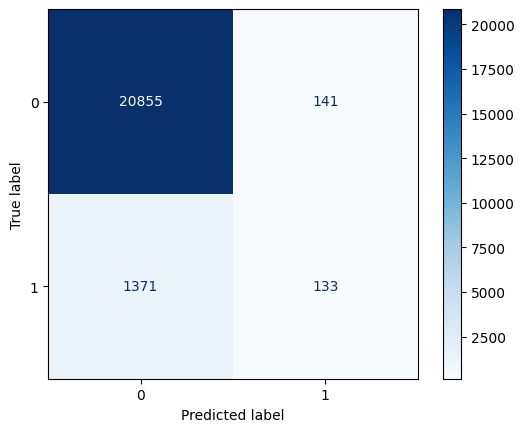


 Обучение финальной модели на ВСЕХ обучающих данных и предсказание ---
Обучение финальной модели заняло: 4.65 сек.
Прогноз сохранен в файл credit_scoring_final_forest.csv

Все задания выполнены.


In [6]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

def write_to_submission_file(predicted_labels, out_file,
                             target='Delinquent90', index_label="client_id"):
    predicted_df = pd.DataFrame(predicted_labels,
                                index=np.arange(75001, 75001 + len(predicted_labels)),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)
    print(f"Прогноз сохранен в файл {out_file}")

train_df = pd.read_csv('credit_scoring_train.csv', index_col='client_id')
test_df = pd.read_csv('credit_scoring_test.csv', index_col='client_id')

y = train_df['Delinquent90']
train_df.drop('Delinquent90', axis=1, inplace=True)

train_df['NumDependents'] = train_df['NumDependents'].fillna(train_df['NumDependents'].median())
train_df['Income'] = train_df['Income'].fillna(train_df['Income'].median())
test_df['NumDependents'] = test_df['NumDependents'].fillna(train_df['NumDependents'].median())
test_df['Income'] = test_df['Income'].fillna(train_df['Income'].median())
print("Данные загружены и обработаны.")

X_train_split, X_valid, y_train_split, y_valid = train_test_split(
    train_df, y, test_size=0.3, random_state=17, stratify=y
)

start_time_grid = time.time()
forest_params = {'max_features': np.linspace(.3, 1, 7)}

locally_best_forest = GridSearchCV(
    RandomForestClassifier(n_estimators=100, random_state=17, n_jobs=-1, class_weight='balanced'),
    forest_params, scoring='roc_auc', cv=5, verbose=1
)
locally_best_forest.fit(X_train_split, y_train_split)

print(f"Поиск лучших параметров занял: {time.time() - start_time_grid:.2f} сек.")
print("Лучшие параметры:", locally_best_forest.best_params_)
print("Лучший ROC AUC на кросс-валидации:", round(locally_best_forest.best_score_, 3))

valid_pred = locally_best_forest.predict(X_valid)
cm = confusion_matrix(y_valid, valid_pred)

print(f"Accuracy на валидационной выборке: {accuracy_score(y_valid, valid_pred):.4f}")
print("Матрица ошибок:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print("\n Обучение финальной модели на ВСЕХ обучающих данных и предсказание ---")
start_time_final = time.time()
final_forest = RandomForestClassifier(
    n_estimators=300,
    max_features=locally_best_forest.best_params_['max_features'],
    random_state=17,
    n_jobs=-1,
    class_weight='balanced'
)
final_forest.fit(train_df, y)
final_forest_pred = final_forest.predict_proba(test_df)[:, 1]

print(f"Обучение финальной модели заняло: {time.time() - start_time_final:.2f} сек.")
write_to_submission_file(final_forest_pred, 'credit_scoring_final_forest.csv')

print("\nВсе задания выполнены.")